In [1]:
%matplotlib inline
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

from utils.plot_utils import *
plt.rcParams['figure.figsize'] = [12, 8]

In [2]:
result_dir = "res/models" # here are the results
plot_dir = "plots" # her go the plots
latex = False # using latex?

if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

if latex:
  latexify()

## Import the available results from ```result_dir```

In [3]:
df = []
results = []
for d in os.listdir(result_dir):
    params = d.split('__')
    res = {p.split('=')[0]: p.split('=')[1] for p in params}
    try:
      df_ = pd.read_csv(result_dir + "/" + d + "/train_log").drop(columns=["Unnamed: 0"])
      res["db"] = df_["test_dbs"].min()
      res["dir"] = d
      res["hist"] = df_["test_dbs"]
      results.append(res)
    except:
      print(f"This job has not yet finished, but folder was created: {d}")
      
df = pd.DataFrame(results)
df#.head()

This job has not yet finished, but folder was created: model=ALISTA_AT__m=250__s=50__k=26__noise=GaussianNoise40__n=750
This job has not yet finished, but folder was created: model=ALISTA_AT__m=250__s=50__k=26__noise=GaussianNoise20__n=2000


,model,m,s,k,noise,n,db,dir,hist
0,ALISTA_AT,250,50,12,GaussianNoise20,500,-21.329557,model=ALISTA_AT__m=250__s=50__k=12__noise=Gaus...,0 -18.510663 1 -18.660853 2 -18.79...
1,ALISTA_AT,250,50,4,GaussianNoise20,500,-15.168944,model=ALISTA_AT__m=250__s=50__k=4__noise=Gauss...,0 -11.008218 1 -11.255260 2 -11.49...
2,NA_ALISTA_UR_128,250,50,28,GaussianNoise20,1000,-21.690997,model=NA_ALISTA_UR_128__m=250__s=50__k=28__noi...,0 -19.741836 1 -20.025338 2 -20.30...
3,AGLISTA,250,50,6,GaussianNoise20,500,-19.415664,model=AGLISTA__m=250__s=50__k=6__noise=Gaussia...,0 -16.940200 1 -17.222394 2 -17.41...
4,FISTA,250,50,16,GaussianNoise20,2500,-3.705792,model=FISTA__m=250__s=50__k=16__noise=Gaussian...,"0 -3.705792 Name: test_dbs, dtype: float64"
...,...,...,...,...,...,...,...,...,...
764,AGLISTA,250,50,26,GaussianNoise20,500,-21.294283,model=AGLISTA__m=250__s=50__k=26__noise=Gaussi...,0 -20.358751 1 -20.590771 2 -20.65...
765,FISTA,250,50,16,GaussianNoise40,1000,-6.698642,model=FISTA__m=250__s=50__k=16__noise=Gaussian...,"0 -6.698642 Name: test_dbs, dtype: float64"
766,AGLISTA,250,50,2,GaussianNoise20,2000,-4.352970,model=AGLISTA__m=250__s=50__k=2__noise=Gaussia...,0 -3.583931 1 -3.645134 2 -3.67094...
767,AGLISTA,250,50,16,GaussianNoise20,1000,-20.888726,model=AGLISTA__m=250__s=50__k=16__noise=Gaussi...,0 -17.037978 1 -17.983333 2 -18.63...


## Vary N, for Gaussian noise 20/40

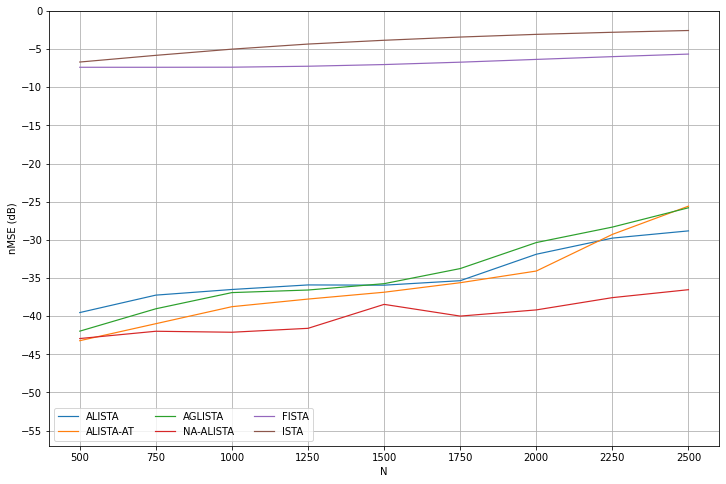

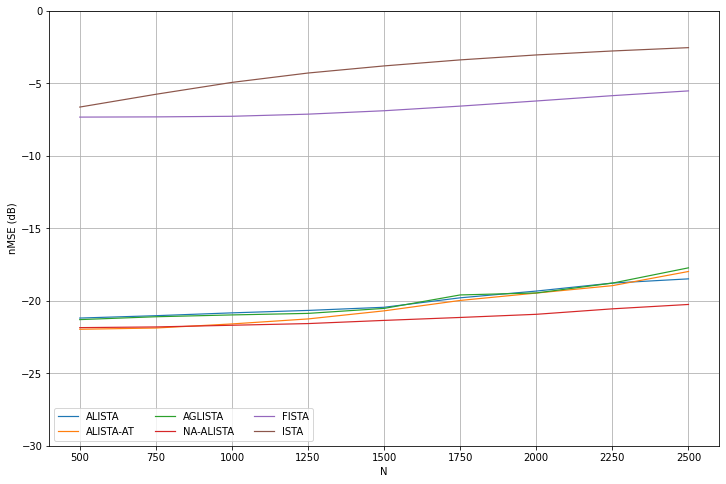

In [4]:
df_ = df
for noisefn, yticks, ylim in [["GaussianNoise40", range(-55, 5, 5), -57], ["GaussianNoise20", range(-30, 5, 5), -30]]:
    df_ = df[df["noise"] == noisefn]
    df_ = df_[df_["k"]=='26']
    for alg, label, linestyle in [["ALISTA", "ALISTA", "--"], ["ALISTA_AT", "ALISTA-AT", ":"], ["AGLISTA", "AGLISTA", "-"],  ["NA_ALISTA_UR_128", "NA-ALISTA","-"], ["FISTA", "FISTA", "-"], ["ISTA", "ISTA", "-"]]:
            df_alg = df_[df_["model"] == alg]
            x_ = [500, 750, 1000,1250, 1500, 1750, 2000, 2250, 2500] 
            x = []
            y = []
            for n in x_:
                try:
                    y.append(df_alg[df_alg["n"]==str(n)]["db"].values[0])
                    x.append(n)
                except Exception as e:
                    f"WARNING: Still missing n={n} for {alg} with {noisefn}."
            plt.plot(x, y, label=label, linewidth=1.2)#, color=c[alg.split("_C")[0]])
            
    plt.ylim(ylim, 0)
    plt.yticks(yticks)
    plt.xticks([500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500])
    plt.legend(loc=3, ncol=3)
    plt.ylabel("nMSE (dB)")
    plt.xlabel("N")
    plt.grid()
    plt.savefig(os.path.join(plot_dir, f"noise={noisefn}__K=16__varyN.pdf"), bbox_inches='tight', pad_inches=0.05)
    plt.show()


## Vary N, for Gaussian noise 20/40, exclude (F)ISTA

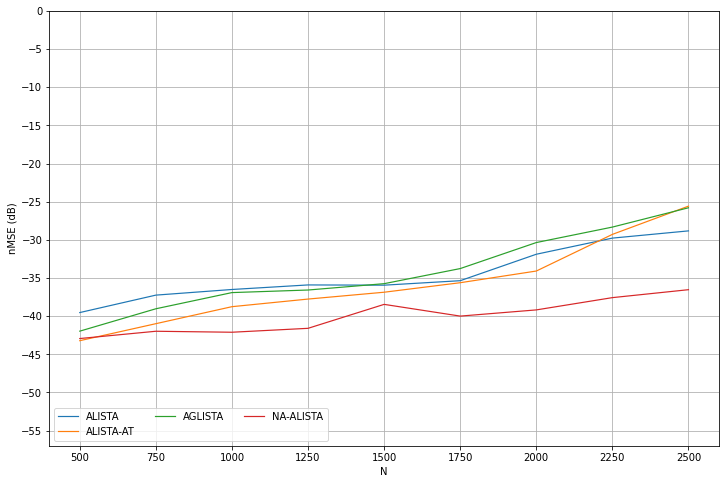

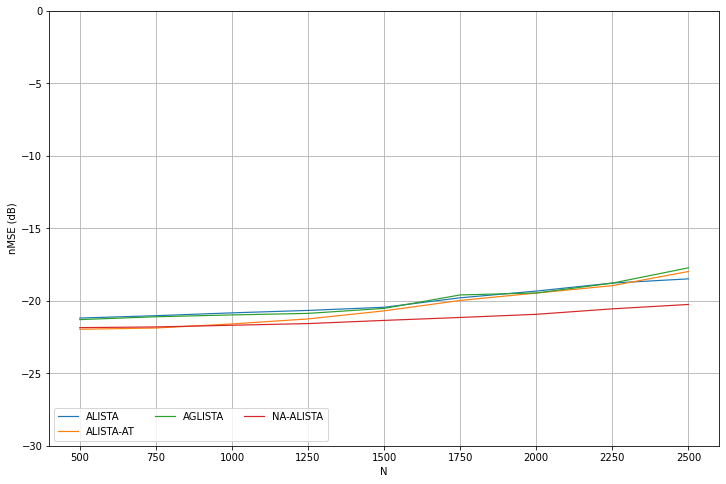

In [5]:
df_ = df
for noisefn, yticks, ylim in [["GaussianNoise40", range(-55, 5, 5), -57], ["GaussianNoise20", range(-30, 5, 5), -30]]:
    df_ = df[df["noise"] == noisefn]
    df_ = df_[df_["k"]=='26']
    for alg, label, linestyle in [["ALISTA", "ALISTA", "--"], ["ALISTA_AT", "ALISTA-AT", ":"], ["AGLISTA", "AGLISTA", "-"],  ["NA_ALISTA_UR_128", "NA-ALISTA","-"]]:
            df_alg = df_[df_["model"] == alg]
            x_ = [500, 750, 1000,1250, 1500, 1750, 2000, 2250, 2500] 
            x = []
            y = []
            for n in x_:
                try:
                    y.append(df_alg[df_alg["n"]==str(n)]["db"].values[0])
                    x.append(n)
                except Exception as e:
                    f"WARNING: Still missing n={n} for {alg} with {noisefn}."
            plt.plot(x, y, label=label, linewidth=1.2)#, color=c[alg.split("_C")[0]])
            
    plt.ylim(ylim, 0)
    plt.yticks(yticks)
    plt.xticks([500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500])
    plt.legend(loc=3, ncol=3)
    plt.ylabel("nMSE (dB)")
    plt.xlabel("N")
    plt.grid()
    plt.savefig(os.path.join(plot_dir, f"noise={noisefn}__K=16__varyN.pdf"), bbox_inches='tight', pad_inches=0.05)
    plt.show()


## Vary k for N=500,1000,2000 and 40/20dB

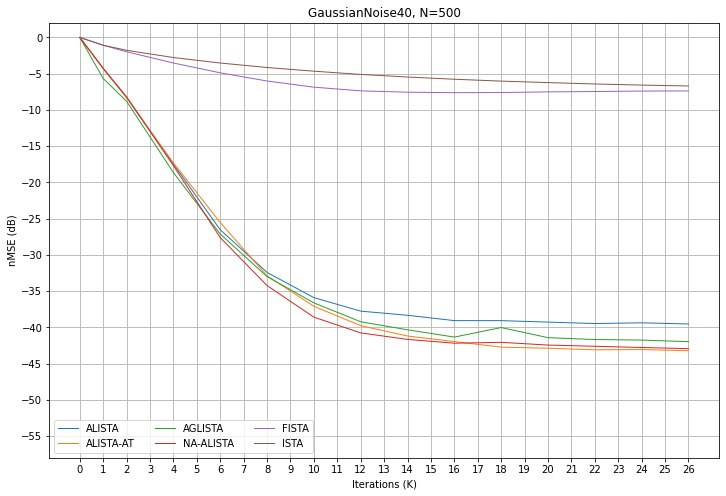

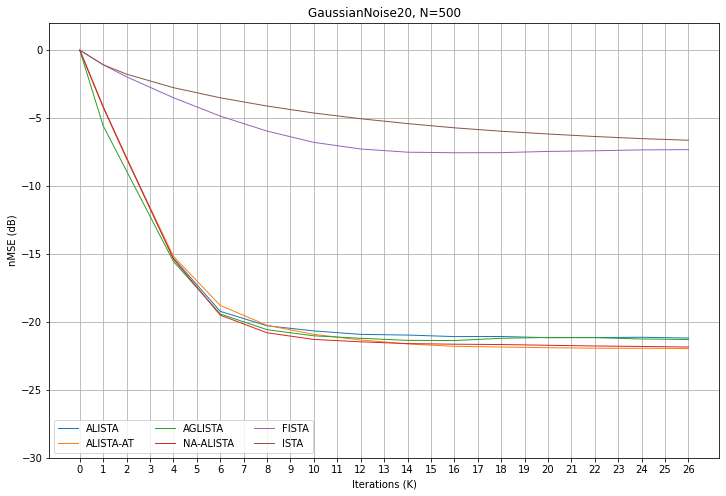

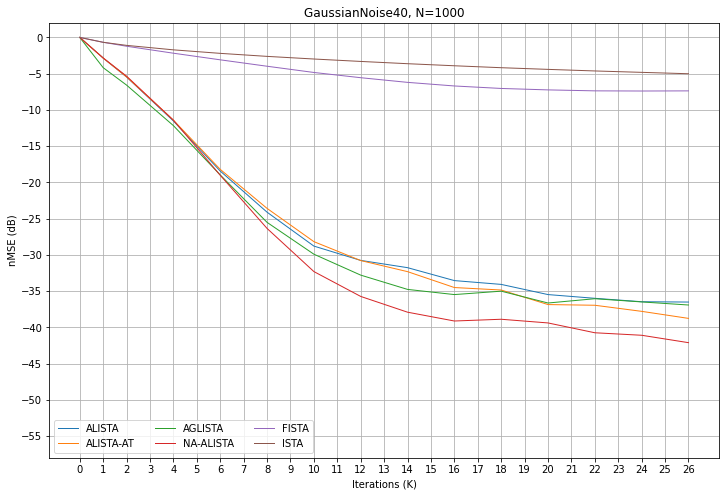

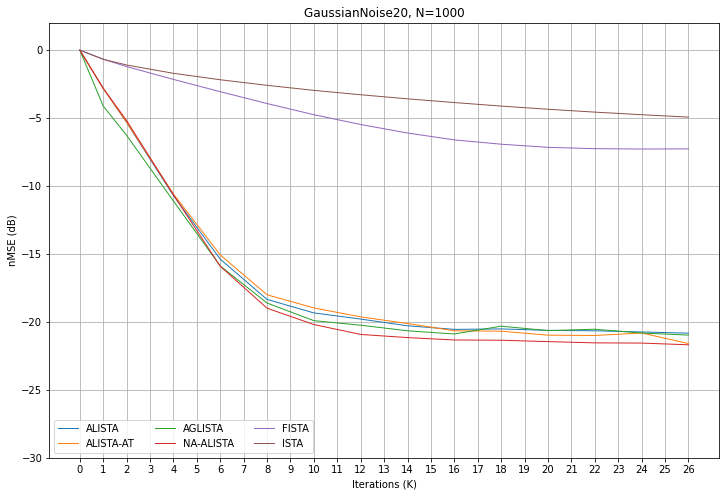

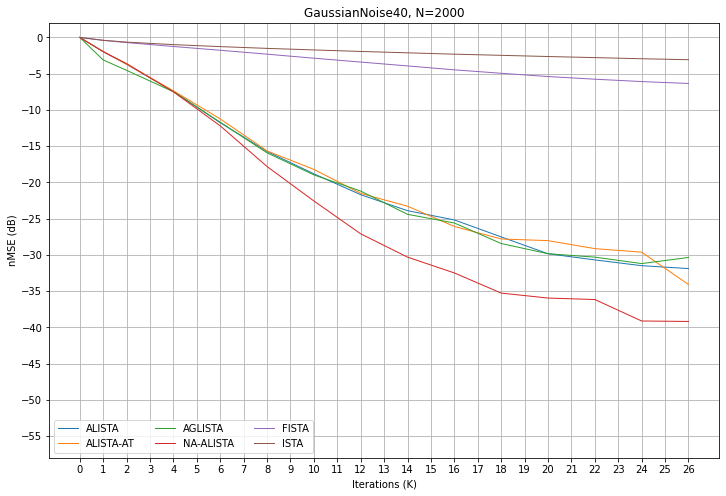

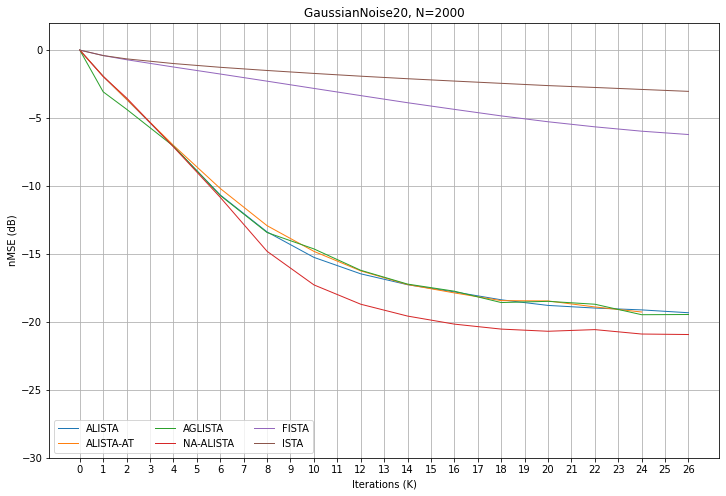

In [6]:
for n in [500,1000, 2000]:

  df_ = df
  for noisefn, yticks, ymin in [["GaussianNoise40", range(-55, 5, 5), -58], ["GaussianNoise20", range(-30, 5, 5), -30]]:
      df_ = df[df["noise"] == noisefn]
      df_ = df_[df_["n"]==str(n)]
      for alg, label, linestyle in [["ALISTA", "ALISTA", "--"], ["ALISTA_AT", "ALISTA-AT", ":"], ["AGLISTA", "AGLISTA", "-"], ["NA_ALISTA_UR_128", "NA-ALISTA","-"], ["FISTA", "FISTA", "-"], ["ISTA", "ISTA", "-"]]:
              df_alg = df_[df_["model"] == alg]
              x_ = [0, 1, 2, 4, 6, 8, 10, 12, 14, 16,18,20,22,24,26]
              x = [0]
              y = [0]
              for k in x_[1:]:
                  try:
                      y.append(df_alg[df_alg["k"]==str(k)]["db"].values[0])
                      x.append(k)
                  except Exception as e:
                      f"WARNING: Still missing k={k} for {alg}."
              plt.plot(x, y, label=label, linewidth=1)
      plt.title(noisefn + f', N={n}')
              
      plt.ylim(ymin, 2)
      plt.yticks(yticks)
      plt.xticks(range(27))
      plt.legend(loc=3, ncol=3)
      plt.ylabel("nMSE (dB)")
      plt.xlabel("Iterations (K)")
      plt.grid()
      plt.savefig(os.path.join(plot_dir, f"varyk__n={n}_noise={noisefn}.pdf"), bbox_inches='tight', pad_inches=0.05)
      plt.show()


## Evaluate different numbers of hidden units in LSTM for NA-ALISTA

<ipython-input-7-8e277b921d57>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['h'] = df_.model.apply(lambda x: int(x.split('_')[-1]))


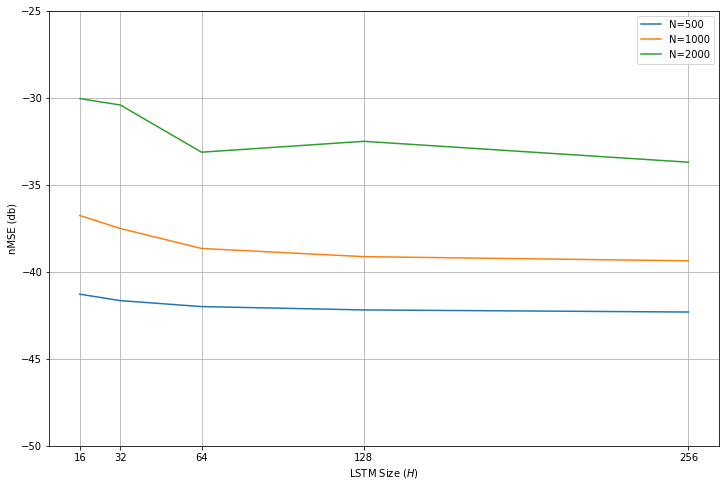

In [7]:
df_ = df[df.model.str.contains("NA_ALISTA_UR_")]
df_['h'] = df_.model.apply(lambda x: int(x.split('_')[-1]))
df_.h
df_ = df_[df_.k=='16']
df_ = df_[df_['noise'] == 'GaussianNoise40']
df_ = df_[np.logical_or(np.logical_or(df_.n == '1000' ,df_.n=='2000'), df_.n == '500')]
df_ = df_[['h','n','db']].pivot(index='n',columns='h',values='db').T
plt.plot(df_.index,df_['500'].values,label='N=500')
plt.plot(df_.index, df_['1000'].values,label='N=1000')
plt.plot(df_.index,df_['2000'].values,label='N=2000')
plt.yticks(range(-50, -20, 5))
plt.xticks(df_.index,[str(i) for i in df_.index])
plt.xlabel('LSTM Size ($H$)')
plt.ylabel('nMSE (db)')
plt.legend()
plt.grid()
plt.savefig(os.path.join(plot_dir, 'compare_hidden.pdf'), bbox_inches='tight', pad_inches=0.05)



## Explore the learning rates

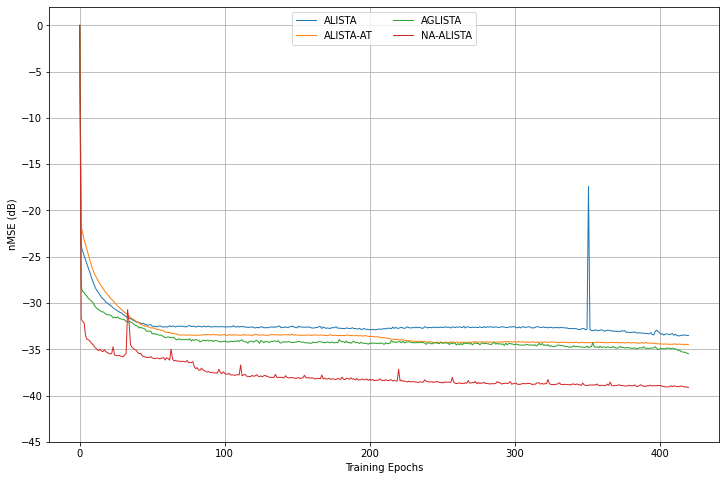

In [8]:
for n in [1000]:

  df_ = df
  for noisefn, yticks in [["GaussianNoise40", range(-45, 5, 5)]]:
      df_ = df[df["noise"] == noisefn]
      df_ = df_[df_["n"]==str(n)]
      df_ = df_[df_["k"]==str(16)]
      for alg, label, linestyle in [["ALISTA", "ALISTA", "--"], ["ALISTA_AT", "ALISTA-AT", ":"], ["AGLISTA", "AGLISTA", "-"], ["NA_ALISTA_UR_128", "NA-ALISTA","-"]]:
              df_alg = df_[df_["model"] == alg].iloc[0]
              plt.plot(range(0, len(df_alg["hist"])+1), [0] + list(df_alg["hist"]), label=label, linewidth=1)
              
      plt.ylim(min(yticks), 2)
      plt.yticks(yticks)
      plt.legend(loc=9, ncol=2)
      plt.ylabel("nMSE (dB)")
      plt.xlabel("Training Epochs")
      plt.grid()
      plt.savefig(os.path.join(plot_dir, f"training_n=1000_db=40.pdf"), bbox_inches='tight', pad_inches=0.05)
      plt.show()


## View the adaptive thresholds of NA-ALISTA

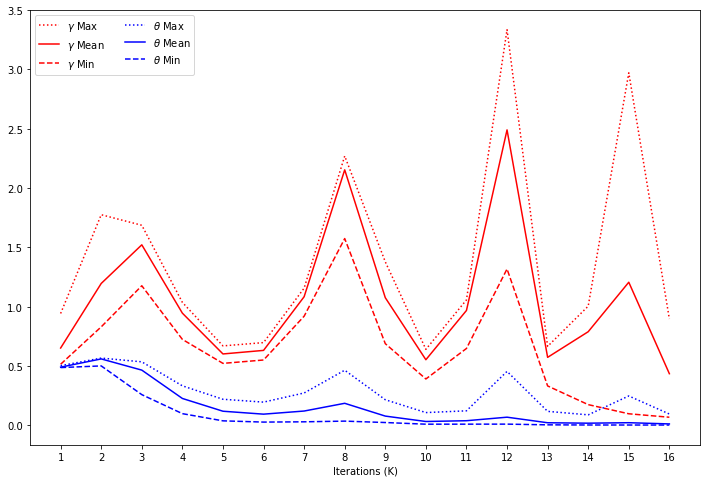

In [9]:
gammas = np.load("res/params/gammas.npy")
thetas = np.load("res/params/thetas.npy")

gammas_mean = gammas.mean(axis=0)
thetas_mean = thetas.mean(axis=0)


gammas_min = gammas.min(axis=0)
thetas_min = thetas.min(axis=0)

gammas_max = gammas.max(axis=0)
thetas_max = thetas.max(axis=0)

k = 16
plt.xticks(range(1, 17))
plt.xlabel("Iterations (K)")
plt.plot(range(1, 17), gammas_max, label="$\gamma$ Max", color="red", linestyle="dotted")
plt.plot(range(1, 17), gammas_mean, label="$\gamma$ Mean", color="red")
plt.plot(range(1, 17), gammas_min, label="$\gamma$ Min", color="red", linestyle="--")
plt.plot(range(1, 17), thetas_max, label="$\\theta$ Max", color="blue", linestyle="dotted")
plt.plot(range(1, 17), thetas_mean, label="$\\theta$ Mean", color="blue")
plt.plot(range(1, 17), thetas_min, label="$\\theta$ Min", color="blue", linestyle="--")
plt.legend(loc=2, ncol=2)
plt.savefig(os.path.join(plot_dir,"gammas_and_thetas.pdf"), bbox_inches='tight', pad_inches=0.05)
plt.show()


## Verify the assumptions required from the reconstruction bound

Using saved phi from res/matrices/250_2000/.
Using saved W from res/matrices/250_2000/.


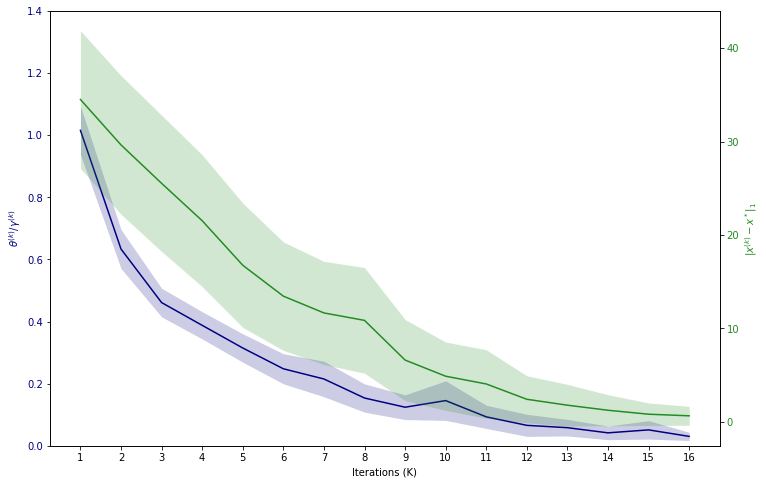

In [10]:
from utils.optimize_matrices import get_matrices
import torch
import torch.nn as nn
import numpy as np
import os
import json
import pandas as pd
from utils.get_data import Synthetic
from utils.noise import GaussianNoise
import torch
from utils.train_utils import *
from utils.all_models import *
import matplotlib.pyplot as plt


if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"

all_models = [NA_ALISTA_R_128,NA_ALISTA_UR_128, NA_ALISTA_U_128]
all_models = {a.__name__ : a for a in all_models}

    
def validate_l1_proportionality(name):
    params = name.split('__')
    params = {p.split('=')[0]: p.split('=')[1] for p in params}
    
    # recover parameters
    n = int(params['n'])
    m = int(params['m'])
    s = int(params['s'])
    k = int(params['k'])
    noise = params['noise']
    p = (np.linspace((s * 1 * 1.2) // k, s * 1 * 1.2, k)).astype(int)
    model_fn = all_models[params['model']]
    noise_fn = {'GaussianNoise40':GaussianNoise(40)}[noise]


    phi, W_frob = get_matrices(m, n)
    data = Synthetic(m, n, s, s, batch_size=10000)
    model = model_fn(m, n, s, k, p, phi, W_frob).to(device)
    model.load(result_dir + '/' + name + "/checkpoint")

    test_loss = []
    test_normalizer = []
    sparsities = []
    with torch.no_grad():
        for epoch in range(1):
            for i, (X, info) in enumerate(data.train_loader):
                if i >= 1:
                  break
                X = X.to(device)
                info = info.to(device)
                y = torch.matmul(X, model.phi.T)
                X_hat, gammas, thetas, cs, xk = model(noise_fn(y), info, include_cs=True)
                
                
                l1_err = []
                for l in range(k):
                  
                  l1_err.append(torch.norm(xk[l]-X, dim=1, p=1).reshape(-1,1))
                
                # use true ground truth
                cs = torch.cat(l1_err,dim=1)

                m = (thetas/(gammas*cs)).cpu().detach().numpy().mean(axis=0)
                s = (thetas/(gammas*cs)).cpu().detach().numpy().std(axis=0)
  
                ax = plt.gca()
                ax2 = ax.twinx()
                plt.xticks(range(1, k+1))

                tm = (thetas/(gammas+0.2*10e-6)).cpu().detach().numpy().mean(axis=0)
                ts = (thetas/(gammas+0.2*10e-6)).cpu().detach().numpy().std(axis=0)

                _cm = (cs).cpu().detach().numpy().mean(axis=0)
                _cs = (cs).cpu().detach().numpy().std(axis=0)
                col = 'navy'
                ax.plot(range(1, k+1),tm,c=col)
                ax.tick_params(axis='y', labelcolor=col)
                ax.fill_between(range(1,k+1),tm+ts, tm-ts, color=col,alpha=0.2, linewidth=0)
                ax.set_ylabel("$\\theta^{(k)} / \gamma^{(k)}$",color=col)
                ax.set_ylim(0,1.4)
    
                col= 'forestgreen'
                ax2.plot(range(1, k+1),_cm,c=col)
                ax2.fill_between(range(1, k+1),_cm+_cs, _cm-_cs, color=col,alpha=0.2, linewidth=0)
                ax2.set_ylabel('$\|x^{(k)}-x^*\|_1$', color=col) 
                ax2.tick_params(axis='y', labelcolor=col)
                ax.set_xlabel('Iterations (K)')
                plt.savefig(os.path.join(plot_dir,f"ratio_to_l1error__noise={noise}__n={n}__model={params['model']}.pdf"), bbox_inches='tight', pad_inches=0.05)
                
                plt.show()

                test_loss.extend(list(((X_hat - X) ** 2).cpu().detach().numpy()))
                test_normalizer.extend(list((X ** 2).cpu().detach().numpy()))


validate_l1_proportionality('model=NA_ALISTA_UR_128__m=250__s=50__k=16__noise=GaussianNoise40__n=2000')